In [1]:
import tensorflow as tf
from tensorflow.python.saved_model import tag_constants
from tensorflow.python.saved_model import signature_constants
import tensorflow_addons as tfa
import cv2
import numpy as np
import matplotlib.pyplot as plt

tfa.register.register_all()
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=768)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)
output_saved_model_dir = "./config/hfnet_v2_trt" 


1 Physical GPUs, 1 Logical GPUs


--- Loading Graph 8.676273584365845 seconds ---
First Try
--- First trial 5.978442430496216 seconds ---
34.9 ms ± 80.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


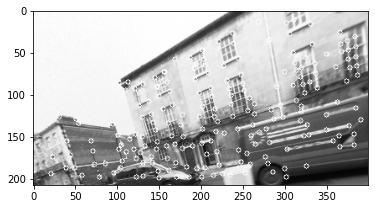

In [3]:
import time
start_time = time.time()

def load():
    saved_model_loaded = tf.saved_model.load(
        output_saved_model_dir, tags=[tag_constants.SERVING])

    frozen_func = graph_func = saved_model_loaded.signatures[
       signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY]
    return frozen_func
frozen_func = load()
print("--- Loading Graph %s seconds ---" % (time.time() - start_time))
def run(img):
    _img = np.expand_dims(img, axis=2)
    _img = np.array([_img]).astype(np.float)
    _img = tf.convert_to_tensor(_img, dtype=tf.float32)
    #print(_img.shape)
    output = frozen_func(_img)
    return output

img = cv2.imread("./db1.jpg")
img = cv2.resize(img, (400, 400))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img[0:208, 0:400]
print("First Try")
start_time = time.time()
ret = run(img)
print("--- First trial %s seconds ---" % (time.time() - start_time))
%timeit ret = run(img)
ret = run(img)

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
kps = ret["keypoints"][0].numpy()
for kp in kps:
    img = cv2.circle(img, (kp[0], kp[1]), 3, (255, 255, 255))
plt.imshow(img)